In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [13]:
#importing the libraries
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from keras import backend as K
import gzip
import sys
import pickle as cPickle

f = gzip.open('/content/drive/My Drive/Colab Notebooks/mnist.pkl.gz', 'rb')
if sys.version_info < (3,):
    data = cPickle.load(f)
else:
    data = cPickle.load(f, encoding='bytes')
f.close()
(x_train, y_train), (x_test, y_test) = data

#split into train and test data
print(x_train.shape, y_train.shape)

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

#create model
batch_size = 128
num_classes = 10
epochs = 10

model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

#fitting the model
model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
print("The model has successfully trained")

model.save('collabmnist.h5')
print('saving the model as collabmnist.h5')

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

(60000, 28, 28) (60000,)
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 46s 761us/step - loss: 0.3890 - acc: 0.8784 - val_loss: 0.0695 - val_acc: 0.9798
Epoch 2/10
60000/60000 [==============================] - 45s 755us/step - loss: 0.1131 - acc: 0.9704 - val_loss: 0.0441 - val_acc: 0.9864
Epoch 3/10
60000/60000 [==============================] - 45s 751us/step - loss: 0.0807 - acc: 0.9790 - val_loss: 0.0347 - val_acc: 0.9888
Epoch 4/10
60000/60000 [==============================] - 45s 753us/step - loss: 0.0640 - acc: 0.9835 - val_loss: 0.0443 - val_acc: 0.9882
Epoch 5/10
60000/60000 [==============================] - 45s 752us/step - loss: 0.0547 - acc: 0.9863 - val_loss: 0.0356 - val_acc: 0.9909
Epoch 6/10
60000/60000 [==============================] - 45s 752us/step - loss: 0.0472 - acc: 0.9879 - val_loss: 0.0264 - val_acc: 0.9926
Epoch 7/10
60000/6

In [15]:
prediction = model.predict(x_test)
import numpy as np
print(np.argmax(prediction[10]))

0


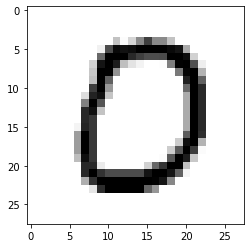

In [16]:
import matplotlib.pyplot as plt
plt.imshow(x_test[10].reshape(28,28),cmap=plt.cm.binary)
plt.show()